In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/14986.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/3138.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/1700.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/16257.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/2863.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/771.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/12167.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/17643.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/6560.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/10162.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/4009.jpg
/kaggle/input/intel-image-classification/seg_train/seg_train/mountain/15823.jpg
/kaggle/input/intel-image-classification/seg_tr

In [2]:
# Hücre 1: Import ve TF/GPU kontrol
import os, sys
import numpy as np
import tensorflow as tf
from tensorflow import keras


print("Python:", sys.version)
print("TensorFlow:", tf.__version__)

2025-09-19 21:25:01.862766: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758317102.211520      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758317102.288562      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
TensorFlow: 2.18.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import os

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Veri setlerinin bulunduğu yolları tanımlayalım
base_dir = '../input/intel-image-classification'
train_dir = os.path.join(base_dir, 'seg_train/seg_train')
test_dir = os.path.join(base_dir, 'seg_test/seg_test')

# Sınıfların listesini alalım
classes = os.listdir(train_dir)
print("Sınıflar:", classes)

Sınıflar: ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [5]:
# Görüntü boyutunu tanımlayalım
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Model mimarisini oluşturalım
model = Sequential([
    # İlk evrişim bloğu
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    
    # İkinci evrişim bloğu
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Üçüncü evrişim bloğu
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Dördüncü evrişim bloğu
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # Görüntü matrisini tek boyutlu bir vektöre dönüştür
    Flatten(),
    
    # Aşırı uydurmayı engellemek için Dropout katmanı
    Dropout(0.5),
    
    # Tam bağlantılı gizli katmanlar
    Dense(512, activation='relu'),
    
    # Çıkış katmanı
    # Softmax, çok sınıflı sınıflandırma için kullanılır
    Dense(6, activation='softmax')
])

# Modeli derleyelim
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modelin özetini yazdıralım
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-19 21:25:23.036390: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,686 (13.18 MB)

 Trainable params: 3,455,686 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Görüntü boyutunu tanımlayalım
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Veri Çoğaltma ve Ön İşleme için ImageDataGenerator'ı oluşturalım
# Eğitim verisi için veri çoğaltma uygulayalım ve pikselleri normalize edelim
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

# Test verisi için sadece normalizasyon uygulayalım
test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator ve validation_generator'ı oluşturalım
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# test_generator'ı oluşturalım
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [8]:
# Modeli eğitelim
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=25, # İsteğe bağlı olarak epoch sayısını artırıp azaltabilirsiniz
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)





/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.4312 - loss: 1.3740 - val_accuracy: 0.5284 - val_loss: 1.1941
Epoch 2/25
  1/350 ━━━━━━━━━━━━━━━━━━━━ 5:17 911ms/step - accuracy: 0.7188 - loss: 0.8261

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


350/350 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - accuracy: 0.7188 - loss: 0.8261 - val_accuracy: 0.5402 - val_loss: 1.1925
Epoch 3/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.5887 - loss: 1.0264 - val_accuracy: 0.6739 - val_loss: 0.8866
Epoch 4/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.6562 - loss: 1.1384 - val_accuracy: 0.6659 - val_loss: 0.8919
Epoch 5/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 382s 1s/step - accuracy: 0.6532 - loss: 0.8963 - val_accuracy: 0.6907 - val_loss: 0.8120
Epoch 6/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.6562 - loss: 0.8039 - val_accuracy: 0.6900 - val_loss: 0.8153
Epoch 7/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.6918 - loss: 0.8190 - val_accuracy: 0.6789 - val_loss: 0.8808
Epoch 8/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.6250 - loss: 1.2063 - val_accuracy: 0.6976 - val_loss: 0.8310
Epoch 9/25
350/350 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.7148 - loss: 0.7660 - val_accurac

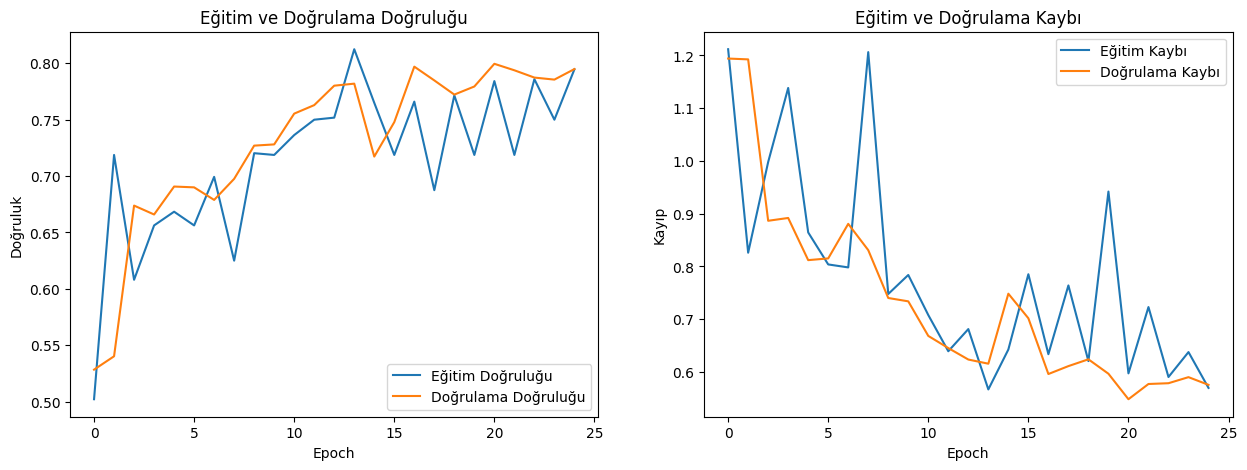

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Doğruluk (Accuracy) ve Kayıp (Loss) grafiklerini çizdirelim
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu')
plt.legend(loc='lower right')
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı')
plt.legend(loc='upper right')
plt.title('Eğitim ve Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 279ms/step


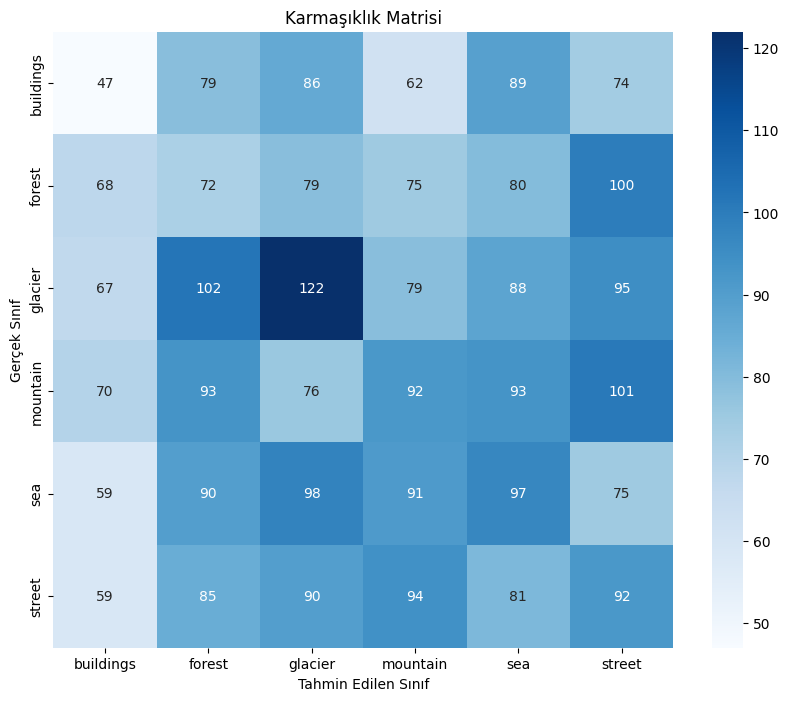


Sınıflandırma Raporu:
              precision    recall  f1-score   support

   buildings       0.13      0.11      0.12       437
      forest       0.14      0.15      0.14       474
     glacier       0.22      0.22      0.22       553
    mountain       0.19      0.18      0.18       525
         sea       0.18      0.19      0.19       510
      street       0.17      0.18      0.18       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



In [10]:
from sklearn.metrics import classification_report, confusion_matrix

# Test verileri üzerinde tahminler yapalım
# İlk olarak, test_generator'ı sıfırlamamız gerekiyor
test_generator.reset()

# Tahminleri alalım
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek etiketleri alalım
y_true = test_generator.classes

# Sınıf etiketlerini alalım
class_labels = list(test_generator.class_indices.keys())

# Karmaşıklık matrisini oluşturalım
cm = confusion_matrix(y_true, y_pred_classes)

# Karmaşıklık matrisini görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

# Sınıflandırma raporunu yazdıralım
print("\nSınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

94/94 ━━━━━━━━━━━━━━━━━━━━ 25s 262ms/step


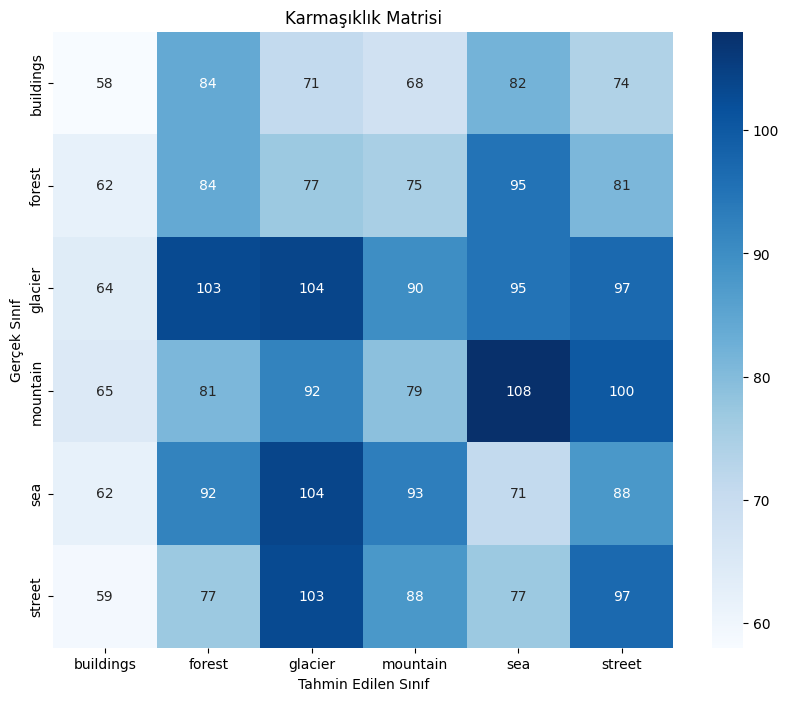


Sınıflandırma Raporu:
              precision    recall  f1-score   support

   buildings       0.16      0.13      0.14       437
      forest       0.16      0.18      0.17       474
     glacier       0.19      0.19      0.19       553
    mountain       0.16      0.15      0.16       525
         sea       0.13      0.14      0.14       510
      street       0.18      0.19      0.19       501

    accuracy                           0.16      3000
   macro avg       0.16      0.16      0.16      3000
weighted avg       0.16      0.16      0.16      3000



In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# test_generator'ı sıfırlayalım ve tahminleri alalım
test_generator.reset()
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Gerçek etiketleri (y_true) doğru sırada alalım
y_true = test_generator.classes

# Sınıf etiketlerini alalım
class_labels = list(test_generator.class_indices.keys())

# Karmaşıklık matrisini oluşturalım
cm = confusion_matrix(y_true, y_pred_classes)

# Karmaşıklık matrisini görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

# Sınıflandırma raporunu yazdıralım
print("\nSınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

94/94 ━━━━━━━━━━━━━━━━━━━━ 24s 251ms/step


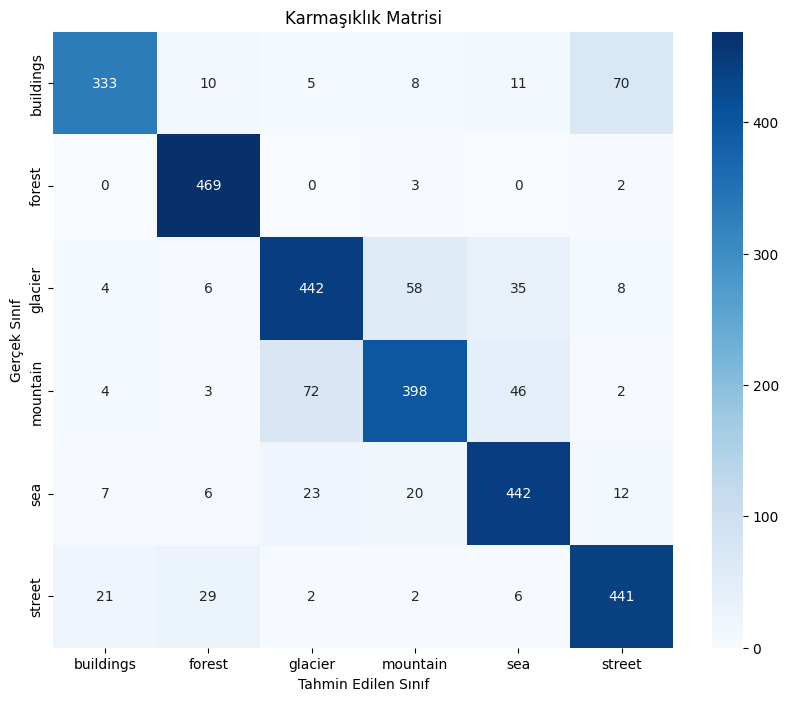


Sınıflandırma Raporu:
              precision    recall  f1-score   support

   buildings       0.90      0.76      0.83       437
      forest       0.90      0.99      0.94       474
     glacier       0.81      0.80      0.81       553
    mountain       0.81      0.76      0.79       525
         sea       0.82      0.87      0.84       510
      street       0.82      0.88      0.85       501

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.84      3000



In [12]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Test verileri için yolu tanımlayalım
test_dir = '../input/intel-image-classification/seg_test/seg_test'

# Sınıf isimlerini alfabetik sırada alalım
class_labels = sorted(os.listdir(test_dir))

# Gerçek etiketleri (y_true) ve dosya yollarını oluşturalım
y_true_list = []
test_images_list = []
for i, class_name in enumerate(class_labels):
    class_path = os.path.join(test_dir, class_name)
    for img_name in os.listdir(class_path):
        test_images_list.append(os.path.join(class_path, img_name))
        y_true_list.append(i) # Her sınıf için indeks atayalım

# Gerçek etiketleri NumPy dizisine dönüştürelim
y_true = np.array(y_true_list)

# Test verilerini belleğe yükleyelim ve pikselleri normalize edelim
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_HEIGHT, IMG_WIDTH))
    img = img / 255.0
    return img

# Tüm test görüntülerini yükleyelim ve bir diziye dönüştürelim
test_images = np.array([load_and_preprocess_image(path) for path in test_images_list])

# Model üzerinde tahmin yapalım
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Karmaşıklık matrisini oluşturalım
cm = confusion_matrix(y_true, y_pred_classes)

# Karmaşıklık matrisini görselleştirelim
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Karmaşıklık Matrisi')
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.show()

# Sınıflandırma raporunu yazdıralım
print("\nSınıflandırma Raporu:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

In [13]:
import os

# "street" klasörünün yolunu tanımla
street_dir = '../input/intel-image-classification/seg_test/seg_test/street'

# Klasördeki tüm dosyaları listeleyip ilk 5 tanesini yazdıralım
files_in_dir = os.listdir(street_dir)
print("Street klasöründeki dosyalar:")
print(files_in_dir[:5])

Street klasöründeki dosyalar:
['20088.jpg', '21494.jpg', '23273.jpg', '21154.jpg', '20937.jpg']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


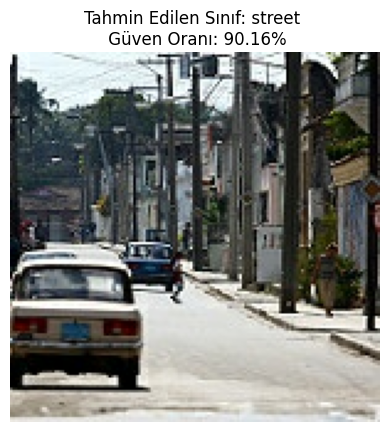

Tahmin Edilen Sınıf: street
Modelin Tahmine Olan Güveni: 90.16%


In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# "street" klasörünün yolunu tanımla
street_dir = '../input/intel-image-classification/seg_test/seg_test/street'

# Elindeki listeden ilk dosyayı seç
# Dilediğin başka bir dosyayı da seçebilirsin: '21494.jpg', '23273.jpg', vb.
image_path = os.path.join(street_dir, '23273.jpg')

# Görüntüyü yükleme ve ön işleme fonksiyonu
def load_and_preprocess_image_for_demo(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (150, 150)) # Modelinin beklediği boyuta getir
    img = img / 255.0
    return img

# Görüntüyü yükle ve modele uygun hale getir
img_for_pred = load_and_preprocess_image_for_demo(image_path)
img_array = np.expand_dims(img_for_pred, axis=0)

# Tahmin yap
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
confidence = np.max(predictions) * 100

# Sınıf etiketlerini al
class_labels = sorted(os.listdir('../input/intel-image-classification/seg_test/seg_test'))
predicted_class = class_labels[predicted_class_index]

# Sonucu görselleştir
plt.imshow(img_for_pred)
plt.title(f'Tahmin Edilen Sınıf: {predicted_class} \n Güven Oranı: {confidence:.2f}%')
plt.axis('off')
plt.show()

print(f"Tahmin Edilen Sınıf: {predicted_class}")
print(f"Modelin Tahmine Olan Güveni: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


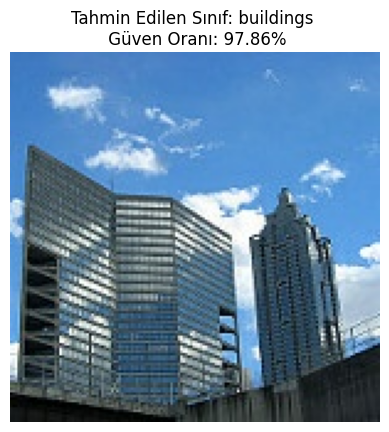

Tahmin Edilen Sınıf: buildings
Modelin Tahmine Olan Güveni: 97.86%


In [15]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import random

# Tahmin yapılacak sınıfı ve yolunu tanımlayalım
demo_class = 'buildings'
demo_class_path = os.path.join('../input/intel-image-classification/seg_test/seg_test', demo_class)

# Klasördeki dosyaları listeyelim ve rastgele bir tanesini seçelim
images_list = os.listdir(demo_class_path)
random_image_name = random.choice(images_list)
image_path = os.path.join(demo_class_path, random_image_name)

# Görüntüyü yükleme ve ön işleme fonksiyonu
def load_and_preprocess_image_for_demo(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (150, 150))
    img = img / 255.0
    return img

# Görüntüyü yükle ve modele uygun hale getir
img_for_pred = load_and_preprocess_image_for_demo(image_path)
img_array = np.expand_dims(img_for_pred, axis=0)

# Tahmin yap
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
confidence = np.max(predictions) * 100

# Sınıf etiketlerini al
class_labels = sorted(os.listdir('../input/intel-image-classification/seg_test/seg_test'))
predicted_class = class_labels[predicted_class_index]

# Sonucu görselleştir
plt.imshow(img_for_pred)
plt.title(f'Tahmin Edilen Sınıf: {predicted_class} \n Güven Oranı: {confidence:.2f}%')
plt.axis('off')
plt.show()

print(f"Tahmin Edilen Sınıf: {predicted_class}")
print(f"Modelin Tahmine Olan Güveni: {confidence:.2f}%")